In [2]:
import numpy as np
from matplotlib import pyplot as plt
from pathlib import Path
import pandas as pd

In [28]:
root_dir = "../200_iteration/constant_then_expon_lr/"
# root_dir = "../optimizer_schema_origin/constant/"

In [29]:
name = ["chair",  'drums', "ficus", "hotdog","lego", "materials", "mic", "ship"]
translation_results = []
rotation_results = []
for obj_name in name:
	rotation_thrshold = 5
	translation_thrshold = 5
	total_files_cm = list(Path(f"{root_dir}/debug_data_{obj_name}/").glob("*cm.npy"))
	total_files_cm = sorted(total_files_cm)
	res = []
	for path in total_files_cm:
		cm = np.load(path)
		res.append(cm[-1])
	res = np.array(res)
	ratio = (res<translation_thrshold).sum() / len(res)
	translation_results.append(ratio)

	total_files_degree = list(Path(f"{root_dir}/debug_data_{obj_name}/").glob("*degree.npy"))
	total_files_degree = sorted(total_files_degree)
	res = []
	for path in total_files_degree:
		degree = np.load(path)
		res.append(degree[-1])
	res = np.array(res)
	ratio = (res<rotation_thrshold).sum() / len(res)
	rotation_results.append(ratio)
df = pd.DataFrame({"name":name, "rotation":rotation_results, "translation":translation_results})
df.T

,0,1,2,3,4,5,6,7
name,chair,drums,ficus,hotdog,lego,materials,mic,ship
rotation,0.96,0.96,0.96,1.0,1.0,1.0,0.88,0.8
translation,0.92,0.96,0.92,1.0,1.0,1.0,0.68,1.0


In [55]:
root_dir = "../400_iteration/constant_then_expon_lr/"
name = ["chair",  'drums', "ficus", "hotdog","lego", "materials", "mic", "ship"]
rotation_thrshold = 0.5
translation_thrshold = 1
results = []
for obj_name in name:

	total_files_cm = list(Path(f"{root_dir}debug_data_{obj_name}/").glob("*cm.npy"))
	total_files_cm = sorted(total_files_cm)
	res = []
	for path in total_files_cm:
		cm = np.load(path)
		res.append(cm[-1])
	res = np.array(res)
	correct_translation = res<translation_thrshold

	total_files_degree = list(Path(f"{root_dir}/debug_data_{obj_name}/").glob("*degree.npy"))
	total_files_degree = sorted(total_files_degree)
	res = []
	for path in total_files_degree:
		degree = np.load(path)
		res.append(degree[-1])
	res = np.array(res)
	correct_rotation = res<rotation_thrshold
	results.append(np.bitwise_and(correct_translation, correct_rotation).sum() / len(correct_rotation))
df = pd.DataFrame({"name":name, "res":results})
df

,name,res
0,chair,1.00
1,drums,1.00
2,ficus,0.88
3,hotdog,1.00
4,lego,1.00
5,materials,0.92
6,mic,0.36
7,ship,0.92


In [56]:
df.mean(0)

/tmp/ipykernel_3143460/1408673503.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.mean(0)


res    0.885
dtype: float64

In [61]:
root_dir = "../400_iteration/constant_then_expon_lr/"

In [69]:
name = ["chair",  'drums', "ficus", "hotdog","lego", "materials", "mic", "ship"]

total_translation_res = []
total_rotation_res = []

for i in [0.001, 0.01, 0.1, 1, 5]:
	translation_results = []
	rotation_results = []
	rotation_thrshold = i
	translation_thrshold = i
	for obj_name in name:
		total_files_cm = list(Path(f"{root_dir}/debug_data_{obj_name}/").glob("*cm.npy"))
		total_files_cm = sorted(total_files_cm)
		res = []
		for path in total_files_cm:
			cm = np.load(path)
			res.append(cm[-1])
		res = np.array(res)
		ratio = (res<translation_thrshold).sum() / len(res)
		translation_results.append(ratio)

		total_files_degree = list(Path(f"{root_dir}/debug_data_{obj_name}/").glob("*degree.npy"))
		total_files_degree = sorted(total_files_degree)
		res = []
		for path in total_files_degree:
			degree = np.load(path)
			res.append(degree[-1])
		res = np.array(res)
		ratio = (res<rotation_thrshold).sum() / len(res)
		rotation_results.append(ratio)
	mean_rotation = np.mean(rotation_results)
	mean_translation = np.mean(translation_results)
	total_rotation_res.append(mean_rotation)
	total_translation_res.append(mean_translation)
print(total_rotation_res)
print(total_translation_res)

[0.665, 0.665, 0.885, 0.925, 0.96]
[0.0, 0.46, 0.885, 0.8899999999999999, 0.95]


([<matplotlib.axis.XTick at 0x7f3fd0512880>,
 [Text(0, 0, '0.001'),
  Text(1, 0, '0.01'),
  Text(2, 0, '0.1'),
  Text(3, 0, '1'),
  Text(4, 0, '5')])

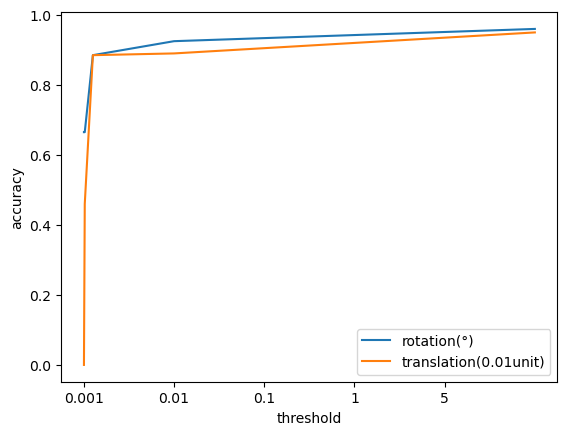

In [74]:
plt.plot([0.001, 0.01, 0.1, 1, 5], total_rotation_res, label="rotation(°)")
plt.plot([0.001, 0.01, 0.1, 1, 5], total_translation_res, label="translation(0.01unit)")
plt.legend()
plt.xlabel("threshold")
plt.ylabel("accuracy")
plt.xticks([0, 1, 2, 3, 4], [0.001, 0.01, 0.1, 1, 5])

([<matplotlib.axis.XTick at 0x7f3fcfb580a0>,
 [Text(0, 0, '0'),
  Text(5, 0, '50'),
  Text(10, 0, '100'),
  Text(15, 0, '150'),
  Text(20, 0, '200'),
  Text(25, 0, '250'),
  Text(30, 0, '300'),
  Text(35, 0, '350'),
  Text(40, 0, '400')])

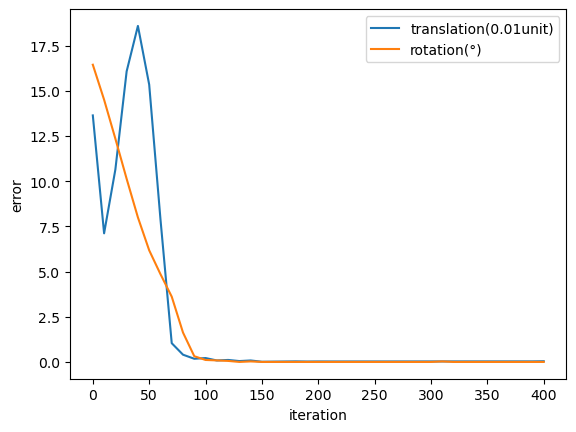

In [99]:
import random
root_dir = Path("../400_iteration/constant/")
total_files = root_dir.rglob("*cm.npy")
total_files = sorted(total_files)

cm_path = random.choice(total_files)
rt_path = str(cm_path).replace("cm.npy", "degree.npy")
cm = np.load(cm_path)
rt = np.load(rt_path)
plt.plot(cm, label="translation(0.01unit)")
plt.plot(rt, label="rotation(°)")
plt.legend()
plt.xlabel("iteration")
plt.ylabel("error")
plt.xticks(np.arange(0, 41, 5), np.arange(0, 41, 5)* 10)

In [11]:
name = ["chair",  'drums', "ficus", "hotdog","lego", "materials", "mic", "ship"]

total_translation_res = []
total_rotation_res = []

_root_dir = "400_iteration"
category = ["constant", "multi_step", "constant_then_expon_lr"]
for i in ["constant", "multi_step", "constant_then_expon_lr"]:
	root_dir = f"../{_root_dir}/{i}"
	translation_results = []
	rotation_results = []
	for obj_name in name:
		total_files_cm = list(Path(f"{root_dir}/debug_data_{obj_name}/").glob("*cm.npy"))
		total_files_cm = sorted(total_files_cm)
		res = []
		for path in total_files_cm:
			cm = np.load(path)
			res.append(cm[-1])
		res = np.array(res)
		translation_results.append(res.mean())

		total_files_degree = list(Path(f"{root_dir}/debug_data_{obj_name}/").glob("*degree.npy"))
		total_files_degree = sorted(total_files_degree)
		res = []
		for path in total_files_degree:
			degree = np.load(path)
			res.append(degree[-1])
		res = np.array(res)
		rotation_results.append(res.mean())
	mean_rotation = np.mean(rotation_results)
	mean_translation = np.mean(translation_results)
	total_rotation_res.append(mean_rotation)
	total_translation_res.append(mean_translation)
print(total_rotation_res)
print(total_translation_res)
df = pd.DataFrame({"category":category, "rot":total_rotation_res, "trans": total_translation_res})
df.T

[0.45706840363143547, 0.5319158739140186, 0.6792533110681248]
[0.9147467525981483, 0.8260910862300079, 1.6609724599429683]


,0,1,2
category,constant,multi_step,constant_then_expon_lr
rot,0.457068,0.531916,0.679253
trans,0.914747,0.826091,1.660972
